# Analyse des Clients Orange - Summer Challenge 2025

Ce projet vise à analyser les données de consommation mobile des clients d'Orange Cameroun.  
L’objectif est de :
1. Explorer les données
2. Visualiser les comportements de consommation
3. Réaliser un clustering (KMeans)
4. Interpréter les résultats et proposer des recommandations



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

#  Monter Google Drive
from google.colab import drive
drive.mount('/content/drive')


In [6]:
#  Charger le dataset depuis Google Drive

file_path = "/content/drive/MyDrive/dataset_clients_orange.csv"

df = pd.read_csv(file_path, encoding='latin1')
df.head()


,client_id,age,region,forfait_type,appels_min,data_mo,sms_envoyes,montant_facture
0,10001,56,Sud-Ouest,prépayé,39,2363,29,2362
1,10002,69,Centre,prépayé,220,1300,41,6045
2,10003,46,Littoral,prépayé,124,1612,36,4624
3,10004,32,Littoral,postpayé,57,1966,29,7540
4,10005,60,Sud-Ouest,prépayé,135,790,27,4654


In [15]:
# Informations générales

print(df.info())

# Vérification des doublons
print("\nNombre de doublons :", df.duplicated().sum())

# Statistiques descriptives
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   client_id        1000 non-null   int64  
 1   age              1000 non-null   int64  
 2   region           1000 non-null   object 
 3   forfait_type     1000 non-null   object 
 4   appels_min       1000 non-null   int64  
 5   data_mo          1000 non-null   int64  
 6   sms_envoyes      1000 non-null   int64  
 7   montant_facture  1000 non-null   int64  
 8   cluster          1000 non-null   int32  
 9   pca1             1000 non-null   float64
 10  pca2             1000 non-null   float64
dtypes: float64(2), int32(1), int64(6), object(2)
memory usage: 82.2+ KB
None

Nombre de doublons : 0


,client_id,age,appels_min,data_mo,sms_envoyes,montant_facture,cluster,pca1,pca2
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03
mean,10500.500000,43.81900,205.918000,1509.689000,29.842000,5069.027000,1.025000,7.105427e-18,-2.131628e-17
std,288.819436,14.99103,97.219179,490.448291,5.453511,2720.937526,0.810575,1.040153e+00,1.015924e+00
min,10001.000000,18.00000,0.000000,0.000000,15.000000,1000.000000,0.000000,-3.169033e+00,-3.302562e+00
25%,10250.750000,31.00000,138.000000,1179.000000,26.000000,2960.250000,0.000000,-7.348455e-01,-6.804205e-01
50%,10500.500000,44.00000,205.000000,1501.500000,30.000000,4973.500000,1.000000,-1.704825e-02,2.824998e-02
75%,10750.250000,56.00000,268.250000,1841.500000,33.000000,6977.250000,2.000000,7.279745e-01,6.811979e-01
max,11000.000000,69.00000,463.000000,3096.000000,49.000000,14338.000000,2.000000,3.209065e+00,3.039203e+00


 **Observations :**
- Le dataset contient 1000 clients avec 8 colonnes.
- Aucun client n’a de valeurs manquantes.
- Il y a deux types de forfaits : prépayé et postpayé.
- La consommation en data varie de 0 à 3096 Mo.


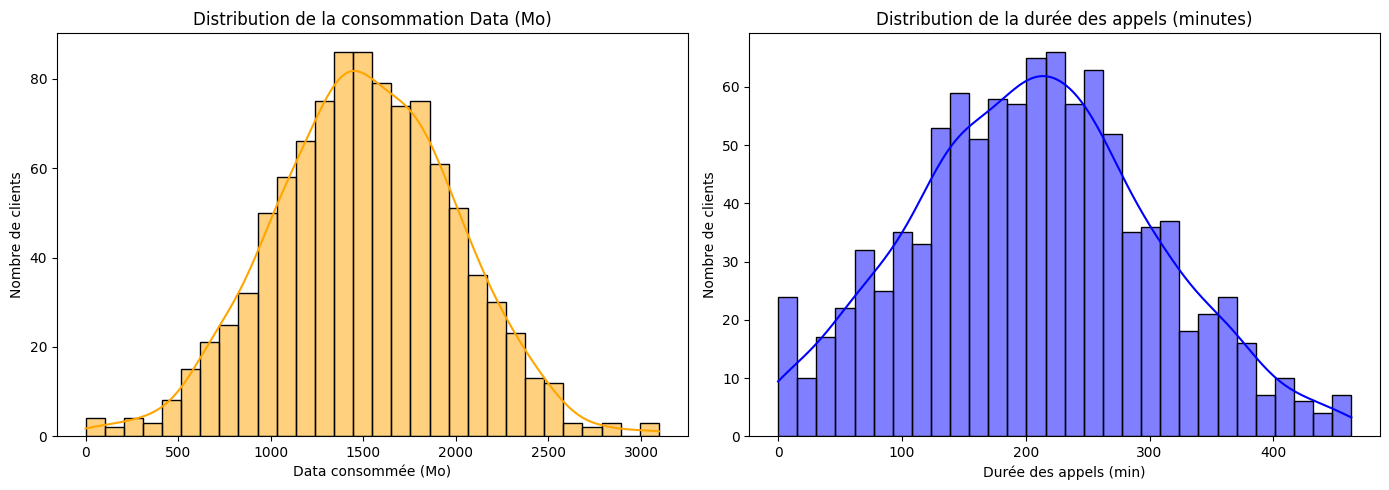

In [9]:
# Histogrammes des consommations data et appels

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df["data_mo"], bins=30, kde=True, ax=axs[0], color="orange")
axs[0].set_title("Distribution de la consommation Data (Mo)")
axs[0].set_xlabel("Data consommée (Mo)")
axs[0].set_ylabel("Nombre de clients")

sns.histplot(df["appels_min"], bins=30, kde=True, ax=axs[1], color="blue")
axs[1].set_title("Distribution de la durée des appels (minutes)")
axs[1].set_xlabel("Durée des appels (min)")
axs[1].set_ylabel("Nombre de clients")

plt.tight_layout()
plt.show()




## Interpretation:

-  **Histogramme Data** : La majorité des clients consomment entre 1000 et 2000 Mo, ce qui peut indiquer une opportunité d’adapter les forfaits data à cette zone.
-  **Histogramme Appels** : La distribution montre plusieurs clients avec des appels inférieurs à 100 minutes, mais aussi une longue traîne jusqu’à plus de 450 minutes.

/tmp/ipython-input-10-4034007465.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="forfait_type", y="montant_facture", palette="pastel")


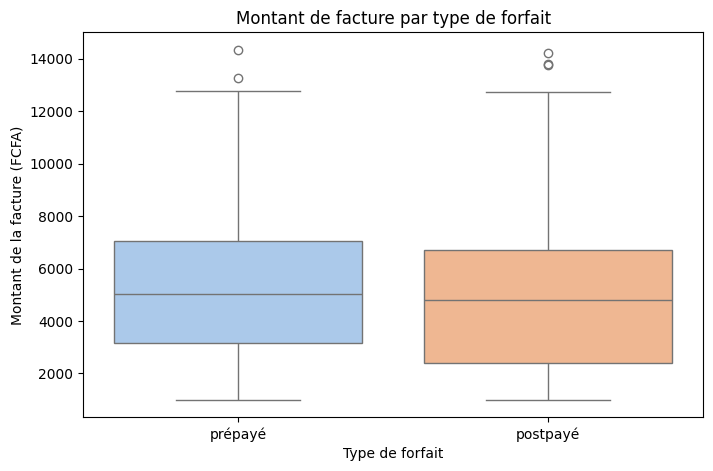

In [10]:
#  Boxplot du montant des factures par type de forfait

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="forfait_type", y="montant_facture", palette="pastel")
plt.title("Montant de facture par type de forfait")
plt.xlabel("Type de forfait")
plt.ylabel("Montant de la facture (FCFA)")
plt.show()


## interpreattion:


-  **Boxplot** : Les clients en postpayé ont des factures nettement plus élevées. Cela peut venir d’un usage plus intensif ou de tarifs différents.

/tmp/ipython-input-11-2909243324.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="region", order=df["region"].value_counts().index, palette="viridis")


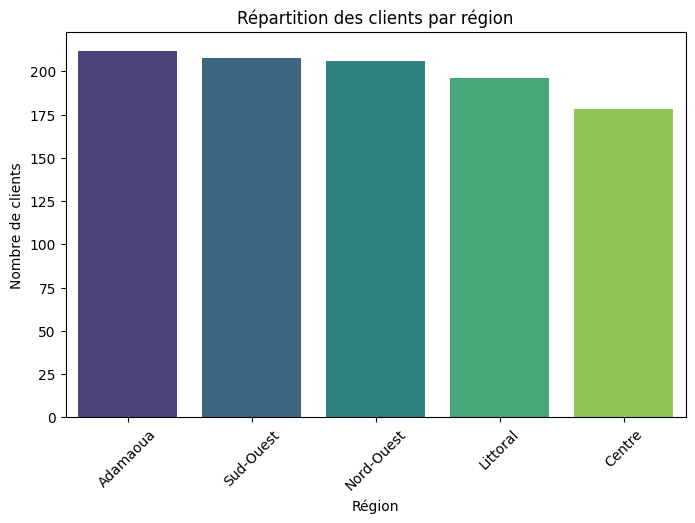

In [11]:
# Répartition des clients par région

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="region", order=df["region"].value_counts().index, palette="viridis")
plt.title("Répartition des clients par région")
plt.xlabel("Région")
plt.ylabel("Nombre de clients")
plt.xticks(rotation=45)
plt.show()


 ## interpretation :

-  **Répartition régionale** : La région la plus représentée est l'**Adamaoua**, suivie du **Centre**. On pourrait lancer des campagnes ciblées géographiquement.


In [13]:
# Standardisation des données numériques
features = ["age", "appels_min", "data_mo", "sms_envoyes", "montant_facture"]
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Application de KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df["cluster"] = kmeans.fit_predict(X_scaled)




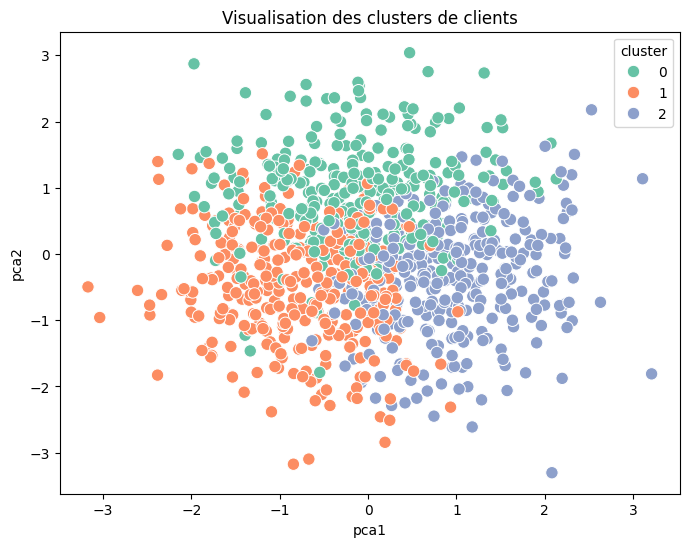

In [14]:
# Réduction de dimension pour visualisation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df["pca1"] = X_pca[:, 0]
df["pca2"] = X_pca[:, 1]

# Visualisation des clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="pca1", y="pca2", hue="cluster", palette="Set2",s=80)
plt.title("Visualisation des clusters de clients")
plt.show()

 **Analyse des clusters :**



- Chaque point représente un client, regroupé selon son profil de consommation.
- On remarque trois groupes distincts :
  - **Cluster 0** : clients à faible consommation (petits usages, petites factures)
  - **Cluster 1** : clients équilibrés
  - **Cluster 2** : gros consommateurs de data/appels, souvent avec factures élevées


## Recommandations Stratégiques

1. **Identifier les groupes de clients à forte consommation data et faible facture**  
   
   Le **cluster 2** regroupe plusieurs clients avec une consommation data élevée (souvent > 2000 Mo) mais avec des factures relativement basses.  
   Ces profils sont **à fort potentiel** : proposer des offres data plus élevées et encourager la migration vers des forfaits adaptés.

2. **Proposer des migrations de forfait pour certains clusters**  
   Le **cluster 1** contient des clients à usage équilibré (appels + data + SMS). Ces profils seraient bien orientés vers des **forfaits postpayés** avec bonus et fidélisation.

3. **Créer des offres SMS personnalisées pour les clients intensifs en messages**  
   Le **cluster 0** a un comportement orienté **SMS**. Il serait mieux de créer une **offre SMS illimitée ou des packs hebdomadaires ciblés** pour renforcer leur engagement.





**Actions marketing suggérées :**
- Bonus data sur certaines   consommation
- Migration vers postpayé pour profils mixtes
- Offres localisées selon la région dominante



**Ce que j'aurait pu faire avec plus de temps :**
- Ajouter une segmentation plus fine avec **t-SNE** ou **DBSCAN**
- Intégrer des variables temporelles ( évolution mensuelle)
- Croiser les données avec le modèle de téléphone ou la profession